## **Identify Face in Dataset**

In [1]:
import pandas as pd
import ast

CSV_PATH = "Sample_Step_dataset.csv"
df = pd.read_csv(CSV_PATH, dtype=str).fillna("")

faces = []

for _, row in df.iterrows():
    entity = row['ENTITY'].strip().upper()
    key = row['KEY']
    if entity == 'ADVANCED_FACE':
        refs = ast.literal_eval(row['REFERENCES']) if row['REFERENCES'] else []
        surface = None
        bounds = []
        for r in refs:
            rstr = str(r)
            ref_row = df[df['KEY'] == rstr]
            if not ref_row.empty:
                ref_entity = ref_row.iloc[0]['ENTITY'].strip().upper()
                if ref_entity in ['CYLINDRICAL_SURFACE', 'CONICAL_SURFACE', 'PLANE']:
                    surface = rstr
                elif ref_entity in ['FACE_BOUND', 'FACE_OUTER_BOUND']:
                    bounds.append(rstr)
        faces.append({
            'face_id': key,
            'surface': surface,
            'bounds': bounds
        })

print("Extracted Faces:")
for f in faces:
    print(f)


Extracted Faces:
{'face_id': '286', 'surface': '1714', 'bounds': ['263']}
{'face_id': '287', 'surface': '200', 'bounds': ['149']}
{'face_id': '288', 'surface': '198', 'bounds': ['97']}
{'face_id': '289', 'surface': '195', 'bounds': ['245']}
{'face_id': '290', 'surface': '203', 'bounds': ['146']}
{'face_id': '291', 'surface': '156', 'bounds': ['137']}
{'face_id': '292', 'surface': '190', 'bounds': ['239']}
{'face_id': '293', 'surface': '139', 'bounds': ['202']}
{'face_id': '294', 'surface': '152', 'bounds': ['204']}
{'face_id': '295', 'surface': '18', 'bounds': ['192']}
{'face_id': '296', 'surface': '237', 'bounds': ['240']}
{'face_id': '297', 'surface': '223', 'bounds': ['246']}
{'face_id': '298', 'surface': '211', 'bounds': ['126']}
{'face_id': '299', 'surface': '487', 'bounds': ['163']}
{'face_id': '300', 'surface': '205', 'bounds': ['266']}
{'face_id': '301', 'surface': '220', 'bounds': ['251']}
{'face_id': '302', 'surface': '515', 'bounds': ['206', '134', '135']}
{'face_id': '303',

# **Identify Edges in Dataset**

In [2]:
import pandas as pd
import ast

CSV_PATH = "Sample_Step_dataset.csv"
df = pd.read_csv(CSV_PATH, dtype=str).fillna("")

edges = []

for _, row in df.iterrows():
    entity = row['ENTITY'].strip().upper()
    key = row['KEY']
    if entity in ['LINE', 'CIRCLE', 'B_SPLINE_CURVE_WITH_KNOTS']:
        d0 = row['D0']
        d1 = row['D1']
        refs = ast.literal_eval(row['REFERENCES']) if row['REFERENCES'] else []
        edges.append({
            'edge_id': key,
            'type': entity,
            'start': d0,
            'end': d1,
            'references': refs
        })

print("Extracted Edges:")
for e in edges:
    print(e)


Extracted Edges:
{'edge_id': '4', 'type': 'CIRCLE', 'start': "'NONE'", 'end': '1399', 'references': ['1399']}
{'edge_id': '6', 'type': 'LINE', 'start': "'NONE'", 'end': '1235', 'references': ['1235', '259']}
{'edge_id': '7', 'type': 'CIRCLE', 'start': "'NONE'", 'end': '1403', 'references': ['1403']}
{'edge_id': '8', 'type': 'LINE', 'start': "'NONE'", 'end': '1221', 'references': ['1221', '10']}
{'edge_id': '9', 'type': 'LINE', 'start': "'NONE'", 'end': '349', 'references': ['349', '13']}
{'edge_id': '14', 'type': 'LINE', 'start': "'NONE'", 'end': '268', 'references': ['268', '78']}
{'edge_id': '15', 'type': 'LINE', 'start': "'NONE'", 'end': '798', 'references': ['798', '16']}
{'edge_id': '17', 'type': 'LINE', 'start': "'NONE'", 'end': '1234', 'references': ['1234', '253']}
{'edge_id': '20', 'type': 'CIRCLE', 'start': "'NONE'", 'end': '1408', 'references': ['1408']}
{'edge_id': '27', 'type': 'LINE', 'start': "'NONE'", 'end': '1224', 'references': ['1224', '73']}
{'edge_id': '28', 'type'

### **Identify Vertex in Dataset**



In [3]:
import pandas as pd
import ast

CSV_PATH = "Sample_Step_dataset.csv"
df = pd.read_csv(CSV_PATH, dtype=str).fillna("")

def to_float(x):
    try: return float(x)
    except: return None

vertices = []

for _, row in df.iterrows():
    entity = row['ENTITY'].strip().upper()
    key = row['KEY']
    if entity == 'VERTEX_POINT':
        refs = ast.literal_eval(row['REFERENCES']) if row['REFERENCES'] else []
        if refs:
            ref_key = str(refs[0])
            point_row = df[df['KEY'] == ref_key]
            if not point_row.empty:
                x = to_float(point_row.iloc[0]['D0'])
                y = to_float(point_row.iloc[0]['D1'])
                z = to_float(point_row.iloc[0]['D2'])
                vertices.append({'vertex_id': key, 'x': x, 'y': y, 'z': z})

print("Extracted Vertices:")
for v in vertices:
    print(v)


Extracted Vertices:
{'vertex_id': '356', 'x': None, 'y': -21.21335182349479, 'z': 7.129999999999994}
{'vertex_id': '369', 'x': None, 'y': -21.21335182349479, 'z': 15.85}
{'vertex_id': '370', 'x': None, 'y': -21.21335182349479, 'z': 3.9299999999999935}
{'vertex_id': '371', 'x': None, 'y': -8.599999999999996, 'z': -18.750000000000007}
{'vertex_id': '372', 'x': None, 'y': -21.21335182349479, 'z': -6.0700000000000065}
{'vertex_id': '373', 'x': None, 'y': -8.599999999999996, 'z': -18.750000000000007}
{'vertex_id': '374', 'x': None, 'y': -21.21335182349479, 'z': 7.129999999999994}
{'vertex_id': '375', 'x': None, 'y': -21.21335182349479, 'z': 15.85}
{'vertex_id': '376', 'x': None, 'y': 26.5, 'z': -18.750000000000007}
{'vertex_id': '377', 'x': None, 'y': -21.21335182349479, 'z': -6.0700000000000065}
{'vertex_id': '378', 'x': None, 'y': 26.5, 'z': -18.750000000000007}
{'vertex_id': '379', 'x': None, 'y': -21.213351823494794, 'z': -11.33180729995788}
{'vertex_id': '380', 'x': None, 'y': -21.2133

### **Calculate loss & accuracy in face, edges and vertices**
---



In [4]:
# cnn_classify_geometry.py

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras import layers, models
import tensorflow as tf

# --- Load dataset ---
df = pd.read_csv("Sample_Step_dataset.csv")

# --- Identify features and label ---
label_col = "REFERENCES"  # Replace with actual label column if different
X_df = df.drop(columns=[label_col])
y_ser = df[label_col].astype(str)

# --- Encode labels (e.g., vertex=0, edge=1, face=2) ---
le = LabelEncoder()
y = le.fit_transform(y_ser)

# --- Convert features to numeric ---
X = X_df.apply(pd.to_numeric, errors='coerce').fillna(0).values

# --- Normalize ---
scaler = StandardScaler()
X = scaler.fit_transform(X)

# --- Reshape features into 3×3 "image" patches ---
n_features = X.shape[1]
side = int(np.ceil(np.sqrt(n_features)))  # smallest square
pad_size = side**2 - n_features
X_padded = np.pad(X, ((0,0),(0,pad_size)), mode='constant')
X_img = X_padded.reshape(-1, side, side, 1)

# --- Split data ---
X_train, X_test, y_train, y_test = train_test_split(X_img, y, test_size=0.2, random_state=42)

# --- Define CNN model ---
model = models.Sequential([
    layers.Conv2D(32, (2, 2), activation='relu', input_shape=(side, side, 1)),
    layers.MaxPooling2D((1, 1)),
    layers.Conv2D(64, (2, 2), activation='relu'),
    layers.MaxPooling2D((1, 1)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(le.classes_), activation='softmax')  # Number of classes based on unique labels
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# --- Train ---
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=30,
                    batch_size=16,
                    verbose=2)

# --- Evaluate ---
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")

# --- Save ---
model.save("geometry_classifier_cnn.h5")
print("Saved model as geometry_classifier_cnn.h5")

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


82/82 - 2s - 30ms/step - accuracy: 0.3503 - loss: 6.0243 - val_accuracy: 0.3538 - val_loss: 4.9868
Epoch 2/30
82/82 - 1s - 11ms/step - accuracy: 0.3649 - loss: 4.3877 - val_accuracy: 0.3538 - val_loss: 5.2669
Epoch 3/30
82/82 - 1s - 6ms/step - accuracy: 0.3641 - loss: 3.9990 - val_accuracy: 0.3538 - val_loss: 5.8132
Epoch 4/30
82/82 - 1s - 6ms/step - accuracy: 0.3657 - loss: 3.7443 - val_accuracy: 0.3538 - val_loss: 6.4256
Epoch 5/30
82/82 - 0s - 6ms/step - accuracy: 0.3664 - loss: 3.5199 - val_accuracy: 0.3538 - val_loss: 7.2530
Epoch 6/30
82/82 - 1s - 6ms/step - accuracy: 0.3680 - loss: 3.3162 - val_accuracy: 0.3538 - val_loss: 7.6537
Epoch 7/30
82/82 - 1s - 7ms/step - accuracy: 0.3703 - loss: 3.1592 - val_accuracy: 0.3569 - val_loss: 8.6412
Epoch 8/30
82/82 - 1s - 6ms/step - accuracy: 0.3741 - loss: 3.0330 - val_accuracy: 0.3662 - val_loss: 9.1749
Epoch 9/30
82/82 - 1s - 6ms/step - accuracy: 0.3757 - loss: 2.9421 - val_accuracy: 0.3662 - val_loss: 9.4989
Epoch 10/30
82/82 - 1s - 6ms

Test accuracy: 0.315
Saved model as geometry_classifier_cnn.h5


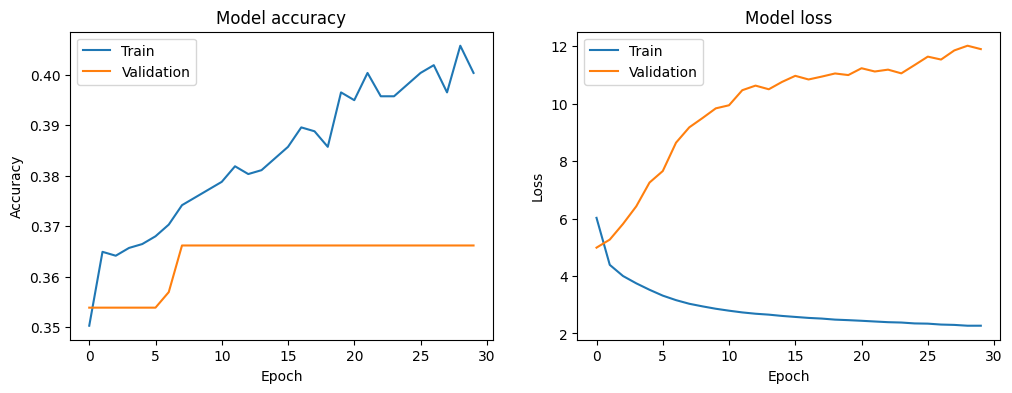

In [5]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# **Identify Holes in Dataset**

In [6]:
import pandas as pd
import ast

CSV_PATH = "Sample_Step_dataset.csv"
df = pd.read_csv(CSV_PATH, dtype=str).fillna("")

def to_float(x):
    try: return float(x)
    except: return None

# Step 1: Extract CARTESIAN_POINTs
points = {}
for _, row in df.iterrows():
    if row['ENTITY'].strip().upper() == 'CARTESIAN_POINT':
        key = row['KEY']
        x, y, z = to_float(row['D0']), to_float(row['D1']), to_float(row['D2'])
        if None not in (x, y, z):
            points[key] = (x, y, z)

# Step 2: Extract CIRCLEs
circles = {}
for _, row in df.iterrows():
    if row['ENTITY'].strip().upper() == 'CIRCLE':
        key = row['KEY']
        radius = to_float(row['D1'])
        refs = ast.literal_eval(row['REFERENCES']) if row['REFERENCES'] else []
        if refs:
            center_key = str(refs[0])
            if center_key in points and radius:
                circles[key] = {
                    "center": points[center_key],
                    "radius": radius,
                    "center_key": center_key
                }

# Step 3: Extract CYLINDRICAL_SURFACE and CONICAL_SURFACE
surfaces = {}
for _, row in df.iterrows():
    entity = row['ENTITY'].strip().upper()
    if entity in ['CYLINDRICAL_SURFACE', 'CONICAL_SURFACE']:
        key = row['KEY']
        radius = to_float(row['D1'])
        angle = to_float(row['D2']) if entity == 'CONICAL_SURFACE' else None
        surfaces[key] = {
            "type": entity,
            "radius": radius,
            "angle": angle
        }

# Step 4: Match ADVANCED_FACE to surfaces
faces = {}
for _, row in df.iterrows():
    if row['ENTITY'].strip().upper() == 'ADVANCED_FACE':
        key = row['KEY']
        refs = ast.literal_eval(row['REFERENCES']) if row['REFERENCES'] else []
        for r in refs:
            rstr = str(r)
            if rstr in surfaces:
                faces[key] = {
                    "surface": rstr,
                    "surface_type": surfaces[rstr]['type'],
                    "radius": surfaces[rstr]['radius'],
                    "angle": surfaces[rstr].get('angle')
                }

# Step 5: Combine hole candidates
holes = []
for face_id, data in faces.items():
    surface_id = data['surface']
    radius = data['radius']
    surface_type = data['surface_type']
    # Try to find matching circle
    match = None
    for cid, cdata in circles.items():
        if abs(cdata['radius'] - radius) < 0.01:
            match = cdata
            break
    holes.append({
        "hole_id": face_id,
        "surface_id": surface_id,
        "type": surface_type,
        "radius": radius,
        "angle": data.get('angle'),
        "center": match['center'] if match else None,
        "circle_id": cid if match else None
    })

# Step 6: Print results
print("Identified Holes:")
for h in holes:
    print(f"- Hole {h['hole_id']} ({h['type']}): radius={h['radius']}, center={h['center']}, surface={h['surface_id']}, circle={h['circle_id']}")


Identified Holes:
- Hole 286 (CYLINDRICAL_SURFACE): radius=1466.0, center=None, surface=1714, circle=None
- Hole 287 (CYLINDRICAL_SURFACE): radius=1579.0, center=None, surface=200, circle=None
- Hole 288 (CYLINDRICAL_SURFACE): radius=1465.0, center=None, surface=198, circle=None
- Hole 289 (CYLINDRICAL_SURFACE): radius=1578.0, center=None, surface=195, circle=None
- Hole 290 (CYLINDRICAL_SURFACE): radius=1464.0, center=None, surface=203, circle=None
- Hole 291 (CYLINDRICAL_SURFACE): radius=1462.0, center=None, surface=156, circle=None
- Hole 292 (CONICAL_SURFACE): radius=1459.0, center=None, surface=190, circle=None
- Hole 293 (CYLINDRICAL_SURFACE): radius=1638.0, center=None, surface=139, circle=None
- Hole 294 (CYLINDRICAL_SURFACE): radius=1637.0, center=None, surface=152, circle=None
- Hole 295 (CONICAL_SURFACE): radius=1558.0, center=None, surface=18, circle=None
- Hole 296 (CYLINDRICAL_SURFACE): radius=1641.0, center=None, surface=237, circle=None
- Hole 297 (CYLINDRICAL_SURFACE):

# CNN Model to identify or observe loss in object for removing holes in dataset of STEP file.

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import ast # Import the ast module to safely evaluate the string literals

import tensorflow as tf
from tensorflow.keras import layers, models

# --- Load dataset ---
CSV_PATH = "Sample_Step_dataset.csv"  # path to your file
df = pd.read_csv(CSV_PATH)

# --- Define target column ---
TARGET_COLUMN = "REFERENCES"   # <- change this if the "holes" column has a different name

# Drop identifier-like columns (like KEY, ENTITY, etc.)
id_like_cols = [c for c in df.columns if df[c].nunique() == len(df)]
if id_like_cols:
    print("Dropping ID-like columns:", id_like_cols)
    df = df.drop(columns=id_like_cols)

X = df.drop(columns=[TARGET_COLUMN])
# Fix: Convert the string representation of lists to actual lists and count the elements
y = df[TARGET_COLUMN].apply(lambda x: len(ast.literal_eval(x))).astype(float)

# Convert features to numeric where possible and handle non-numeric values
X = X.apply(pd.to_numeric, errors="coerce").fillna(0).values.astype(np.float32)


# --- Split data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Scale features ---
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- Build regression model (MLP) ---
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1)   # regression output
])

model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# --- Train ---
history = model.fit(
    X_train, y_train,
    validation_split=0.15,
    epochs=50,
    batch_size=32,
    verbose=2
)

# --- Evaluate ---
y_pred = model.predict(X_test).flatten()
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test MSE: {mse:.3f}")
print(f"Test R^2: {r2:.3f}")

# --- Save model ---
model.save("holes_regression_model.h5")
print("Model saved to holes_regression_model.h5")

Dropping ID-like columns: ['KEY']
Epoch 1/50
44/44 - 2s - 35ms/step - loss: 4.4557 - mae: 0.8078 - val_loss: 1.5467 - val_mae: 0.6942
Epoch 2/50
44/44 - 1s - 16ms/step - loss: 3.5536 - mae: 0.6326 - val_loss: 0.7760 - val_mae: 0.5630
Epoch 3/50
44/44 - 0s - 4ms/step - loss: 3.2141 - mae: 0.5409 - val_loss: 0.7015 - val_mae: 0.4924
Epoch 4/50
44/44 - 0s - 4ms/step - loss: 2.9767 - mae: 0.4674 - val_loss: 0.9235 - val_mae: 0.4573
Epoch 5/50
44/44 - 0s - 5ms/step - loss: 2.7961 - mae: 0.3871 - val_loss: 1.0310 - val_mae: 0.4108
Epoch 6/50
44/44 - 0s - 5ms/step - loss: 2.7245 - mae: 0.3357 - val_loss: 1.9383 - val_mae: 0.3926
Epoch 7/50
44/44 - 0s - 5ms/step - loss: 2.6322 - mae: 0.2966 - val_loss: 0.9325 - val_mae: 0.3089
Epoch 8/50
44/44 - 0s - 5ms/step - loss: 2.5868 - mae: 0.2631 - val_loss: 1.3920 - val_mae: 0.3322
Epoch 9/50
44/44 - 0s - 5ms/step - loss: 2.5437 - mae: 0.2537 - val_loss: 1.9531 - val_mae: 0.3525
Epoch 10/50
44/44 - 0s - 5ms/step - loss: 2.5030 - mae: 0.2382 - val_loss

Test MSE: 1.587
Test R^2: -0.034
Model saved to holes_regression_model.h5


## **Finding No of B-Rep in Dataset**

In [8]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Sample_Step_dataset.csv")

# Filter relevant B-Rep entities
faces = df[df["ENTITY"] == "ADVANCED_FACE"]
edges = df[df["ENTITY"].str.contains("EDGE_LOOP")]
vertices = df[df["ENTITY"] == "VERTEX_POINT"]
surfaces = df[df["ENTITY"].str.contains("SURFACE")]
curves = df[df["ENTITY"].isin(["LINE", "CIRCLE", "B_SPLINE_CURVE_WITH_KNOTS"])]

# Build B-Rep structure
brep = {
    "faces": [],
    "edges": [],
    "vertices": [],
    "surfaces": [],
    "curves": []
}

# Populate faces
for _, row in faces.iterrows():
    face = {
        "id": row["KEY"],
        "bounds": row["D1":"D4"].dropna().tolist(),
        "surface_ref": row["D5"]
    }
    brep["faces"].append(face)

# Populate edges
for _, row in edges.iterrows():
    edge = {
        "id": row["KEY"],
        "loop_refs": row["D1":"D6"].dropna().tolist()
    }
    brep["edges"].append(edge)

# Populate vertices
for _, row in vertices.iterrows():
    vertex = {
        "id": row["KEY"],
        "point_ref": row["D1"]
    }
    brep["vertices"].append(vertex)

# Populate surfaces
for _, row in surfaces.iterrows():
    surface = {
        "id": row["KEY"],
        "type": row["ENTITY"],
        "parameters": row["D1":"D6"].dropna().tolist()
    }
    brep["surfaces"].append(surface)

# Populate curves
for _, row in curves.iterrows():
    curve = {
        "id": row["KEY"],
        "type": row["ENTITY"],
        "parameters": row["D1":"D6"].dropna().tolist()
    }
    brep["curves"].append(curve)

# Output B-Rep structure
import json
print(json.dumps(brep, indent=2))


{
  "faces": [
    {
      "id": 286,
      "bounds": [
        "263",
        "1714",
        "0000"
      ],
      "surface_ref": NaN
    },
    {
      "id": 287,
      "bounds": [
        "149",
        "200",
        "0000"
      ],
      "surface_ref": NaN
    },
    {
      "id": 288,
      "bounds": [
        "97",
        "198",
        "0000"
      ],
      "surface_ref": NaN
    },
    {
      "id": 289,
      "bounds": [
        "245",
        "195",
        "0000"
      ],
      "surface_ref": NaN
    },
    {
      "id": 290,
      "bounds": [
        "146",
        "203",
        "0000"
      ],
      "surface_ref": NaN
    },
    {
      "id": 291,
      "bounds": [
        "137",
        "156",
        "0000"
      ],
      "surface_ref": NaN
    },
    {
      "id": 292,
      "bounds": [
        "239",
        "190",
        "0000"
      ],
      "surface_ref": NaN
    },
    {
      "id": 293,
      "bounds": [
        "202",
        "139",
        "0000"
      ],
 

## Find Number of B-Rep Component

In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Sample_Step_dataset.csv")

# Step 1: Identify all ADVANCED_FACE entries
faces = df[df["ENTITY"] == "ADVANCED_FACE"]

# Step 2: Extract the shell reference from each ADVANCED_FACE
# The shell reference is typically in the last column of the REFERENCES field
def extract_shell_refs(refs):
    try:
        return eval(refs)[-1] if refs != "[]" else None
    except:
        return None

faces["shell_id"] = faces["REFERENCES"].apply(extract_shell_refs)

# Step 3: Count unique shell IDs
unique_shells = faces["shell_id"].dropna().unique()
num_shells = len(unique_shells)

# Step 4: Also count MANIFOLD_SOLID_BREP as top-level B-Rep solids
num_breps = df[df["ENTITY"] == "MANIFOLD_SOLID_BREP"].shape[0]

# Combine both counts if needed
print(f"Number of unique shells (B-Rep components): {num_shells}")
print(f"Number of MANIFOLD_SOLID_BREP entries: {num_breps}")
print(f"Estimated total B-Rep structures: {max(num_shells, num_breps)}")

Number of unique shells (B-Rep components): 63
Number of MANIFOLD_SOLID_BREP entries: 1
Estimated total B-Rep structures: 63


/tmp/ipython-input-372369714.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  faces["shell_id"] = faces["REFERENCES"].apply(extract_shell_refs)


## Find number of edges, vertices and faces

In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Sample_Step_dataset.csv")

# Count vertices
num_vertices = df[df["ENTITY"] == "VERTEX_POINT"].shape[0]

# Count edges (using EDGE_LOOP as proxy for edge collections)
num_edges = df[df["ENTITY"] == "EDGE_LOOP"].shape[0]

# Count faces
num_faces = df[df["ENTITY"] == "ADVANCED_FACE"].shape[0]

# Display results
print(f"Number of vertices: {num_vertices}")
print(f"Number of edges: {num_edges}")
print(f"Number of faces: {num_faces}")

Number of vertices: 108
Number of edges: 77
Number of faces: 63


**References in each element with name**


In [11]:
import pandas as pd
import ast

# Load dataset
df = pd.read_csv("Sample_Step_dataset.csv")

# Parse REFERENCES column into lists
def parse_references(ref_str):
    try:
        refs = ast.literal_eval(ref_str)
        if isinstance(refs, list):
            return refs
        else:
            return []
    except Exception:
        return []

df["parsed_references"] = df["REFERENCES"].apply(parse_references)

# Build a lookup dictionary: KEY -> ENTITY
key_to_entity = dict(zip(df["KEY"], df["ENTITY"]))

# Map references from IDs to entity names, ensuring uniqueness
def map_to_entities(ref_list):
    entities = []
    for ref in ref_list:
        try:
            ref_int = int(ref)  # convert string to int key
            if ref_int in key_to_entity:
                entities.append(key_to_entity[ref_int])
        except Exception:
            continue
    return list(set(entities))  # keep only unique entity names

df["referenced_entities"] = df["parsed_references"].apply(map_to_entities)
df["reference_count"] = df["referenced_entities"].apply(len)

# Final result
result = df[["KEY", "ENTITY", "reference_count", "referenced_entities"]]

# Show first 20 rows
print(result.head(20))


    KEY           ENTITY  reference_count        referenced_entities
0     1  CARTESIAN_POINT                0                         []
1     2          PRODUCT                1       [MECHANICAL_CONTEXT]
2     3           PERSON                0                         []
3     4           CIRCLE                1       [AXIS2_PLACEMENT_3D]
4     5        EDGE_LOOP                1            [ORIENTED_EDGE]
5     6             LINE                2  [VECTOR, CARTESIAN_POINT]
6     7           CIRCLE                1       [AXIS2_PLACEMENT_3D]
7     8             LINE                2  [VECTOR, CARTESIAN_POINT]
8     9             LINE                2  [VECTOR, CARTESIAN_POINT]
9    10           VECTOR                1                [DIRECTION]
10   11           VECTOR                1                [DIRECTION]
11   12           VECTOR                1                [DIRECTION]
12   13           VECTOR                1                [DIRECTION]
13   14             LINE          

**Calculate total number of references on each element**

In [12]:
import pandas as pd
import ast
from collections import Counter

# Load dataset
df = pd.read_csv("Sample_Step_dataset.csv")

# Parse REFERENCES column into lists
def parse_references(ref_str):
    try:
        refs = ast.literal_eval(ref_str)
        if isinstance(refs, list):
            return refs
        else:
            return []
    except Exception:
        return []

df["parsed_references"] = df["REFERENCES"].apply(parse_references)

# Build a lookup dictionary: KEY -> ENTITY
key_to_entity = dict(zip(df["KEY"], df["ENTITY"]))

# Map references from IDs to entity names
def map_to_entities(ref_list):
    entities = []
    for ref in ref_list:
        try:
            ref_int = int(ref)  # convert string to int key
            if ref_int in key_to_entity:
                entities.append(key_to_entity[ref_int])
        except Exception:
            continue
    return entities

df["referenced_entities"] = df["parsed_references"].apply(map_to_entities)

# Flatten all references into one list
all_entities = [entity for sublist in df["referenced_entities"] for entity in sublist]

# Count total references per entity type
entity_reference_counts = Counter(all_entities)

# Convert to DataFrame for display
result = pd.DataFrame(entity_reference_counts.items(), columns=["ENTITY", "total_reference_count"])

# Show results
print(result.sort_values(by="total_reference_count", ascending=False).head(20))


                     ENTITY  total_reference_count
3           CARTESIAN_POINT                    347
5                 DIRECTION                    339
2             ORIENTED_EDGE                    326
40               EDGE_CURVE                    326
35             VERTEX_POINT                    326
1        AXIS2_PLACEMENT_3D                    116
36                     LINE                    107
4                    VECTOR                    107
6                 EDGE_LOOP                     77
7             ADVANCED_FACE                     63
10         FACE_OUTER_BOUND                     63
37                   CIRCLE                     52
13                    PLANE                     32
11      CYLINDRICAL_SURFACE                     24
14               FACE_BOUND                     14
18                 APPROVAL                      9
15                   PERSON                      8
21  PERSON_AND_ORGANIZATION                      8
16             ORGANIZATION    